**Q1- Can we use Bagging for regression problems?**

ANS- **Why Bagging Works for Regression**

Bagging (Bootstrap Aggregating) is a general ensemble technique that works for both classification and regression because it simply:

Creates multiple bootstrap samples from the training data

Trains a base model on each sample

Combines their outputs

Classification → majority vote

Regression → average of predictions

**When Bagging Helps in Regression**

Bagging improves performance when your regression model has high variance, such as:

Decision Trees (Regression Trees)

KNN Regression

Neural Networks

It reduces overfitting by averaging many “noisy” models.

**EXAMPLE-**

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
X, y = load_boston(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging Regressor using Decision Tree
model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)

model.fit(X_train, y_train)
pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, pred))


**Q2- What is the difference between multiple model training and single model training?**

ANS- **1. Single Model Training**

Only one model is trained on the entire dataset.

The model tries to learn all patterns by itself.

Performance depends entirely on this single model.

More likely to overfit if data is noisy.

Less computational cost and easier to understand.

**Examples**

One Decision Tree

One Linear Regression model

One SVM model

**2. Multiple Model Training**

More than one model is trained.

Each model may learn different parts or different versions of the data.

Final prediction is made by combining outputs of all models.

Reduces overfitting and improves accuracy.

More computationally expensive.

**Examples**

Bagging (e.g., Random Forest)

Boosting (e.g., XGBoost, AdaBoost)

Stacking / Ensemble methods

**Q3-  Explain the concept of feature randomness in Random Forest.**

ANS- Feature randomness in a Random Forest refers to the technique of selecting a random subset of features at every split while building each decision tree. Instead of considering all features, the algorithm chooses only a few randomly selected features and finds the best split among them. This randomness ensures that each tree in the forest learns different patterns and becomes less correlated with other trees. As a result, the model becomes more diverse, reduces overfitting, and improves prediction accuracy. By forcing each tree to rely on different feature combinations, Random Forest becomes more robust and performs better than a single decision tree or simple bagging.

**Q4- What is OOB (Out-of-Bag) Score?**

ANS- The Out-of-Bag (OOB) score is an internal performance estimate used in Random Forests. During training, each decision tree is built using a bootstrap sample, meaning it randomly selects data points with replacement. Because of this, about one-third of the data is not selected for that tree; these unused points are called out-of-bag samples. After the tree is trained, it predicts the output for its OOB samples, and this process is repeated for every tree in the forest. By combining these OOB predictions for all data points, the Random Forest calculates an OOB score, which acts like a built-in test accuracy.

**For example**, suppose there are 100 data points and a certain tree uses only 65 of them to train; the remaining 35 become that tree’s OOB samples. The tree predicts these 35 points, and similar predictions from all other trees are averaged to compute the final OOB score. This gives a reliable estimate of model accuracy without needing a separate test set or cross-validation.



**Q5-How can you measure the importance of features in a Random Forest model**

ANS- **1. Mean Decrease in Impurity (MDI) / Gini Importance (or variance-decrease for regression)**

This is the default “built-in” importance in many RF implementations (e.g. the feature_importances_ attribute in scikit-learn).

**How it works:** For every tree in the forest, each time a feature is used to split a node, that split reduces some measure of impurity (for classification: Gini impurity or entropy; for regression: variance). The reduction in impurity is credited to the feature. Then these reductions are summed (and often normalized) across all trees.

**Interpretation:** A higher value means that feature contributes more (on average) to reducing uncertainty / variance — i.e. the model “relied more” on that feature.

**Pros:** Fast to compute, does not require extra data.

**Cons / Biases:** It can be biased in favor of features that have many possible split points (e.g. continuous variables or high-cardinality categorical variables) over “simpler” features, possibly exaggerating their importance.

**2. Permutation Feature Importance (Mean Decrease in Accuracy / Error)**

This method measures importance based on how much model performance degrades when you randomly shuffle (permute) a feature’s values.

**How it works:** After training the model, you take a hold-out set (e.g. test set or out-of-bag samples). For each feature individually: you randomly shuffle its values across samples (keeping all other features unchanged), then compute model performance (e.g. accuracy for classification, R² or MSE for regression). The drop in performance (compared to baseline) is a measure of how important that feature was.

**Interpretation:** If permuting a feature causes a large drop in performance → the feature was important. If the performance stays roughly the same → the feature likely had little influence.

**Pros:** More “faithful” to actual model behavior; does not suffer from biases tied to feature types or cardinality; reflects importance in the context of all other features.

**Cons:** More computationally expensive (you must re-evaluate the model many times), especially for large datasets or many features. Also, can be affected by feature correlation: if two features are strongly correlated, shuffling one may not hurt much because the other provides similar information — so importance can be “shared” or diluted.

**Q6-Explain the working principle of a Bagging Classifier.**

ANS- The Bagging Classifier works on the principle of “Bootstrap Aggregating,” where multiple versions of the same base model are trained on different subsets of the training data. These subsets are created using bootstrap sampling, meaning each subset is formed by randomly selecting data points with replacement. Because of this, every model gets a slightly different dataset and learns different patterns. After training, each model makes a prediction for a new input, and the Bagging Classifier combines these predictions using majority voting. Since the final prediction is based on many independent models rather than a single one, bagging reduces variance, minimizes overfitting, and improves overall classification accuracy.

**Q7-  How do you evaluate a Bagging Classifier’s performance?**

ANS- A Bagging Classifier’s performance is evaluated using standard classification metrics on a test dataset or using internal methods like the Out-of-Bag (OOB) score. After training the bagging model, we measure its accuracy, precision, recall, F1-score, and confusion matrix on unseen test data to check how well it generalizes. If OOB sampling is enabled, the model can also estimate performance without a separate test set by predicting the out-of-bag samples left out during bootstrap sampling. This OOB score serves as a reliable measure of accuracy. Additionally, cross-validation can be used to evaluate stability and reduce bias. Together, these evaluation methods help determine whether the Bagging Classifier is accurate, robust, and less prone to overfitting.

**Q8-  How does a Bagging Regressor work?**

ANS- A Bagging Regressor works by training multiple copies of the same regression model on different bootstrap samples of the training data. Each bootstrap sample is created by randomly selecting data points with replacement, so every regressor gets a slightly different dataset and learns different patterns. After all models are trained independently, they each make a prediction for the same input, and the Bagging Regressor combines these outputs by taking the average of all predictions. This averaging reduces the variance of the model, makes the final prediction more stable, and prevents overfitting compared to a single regressor. Because many weak regressors are combined into a strong ensemble, the Bagging Regressor generally gives smoother and more accurate results.

**Q9- What is the main advantage of ensemble techniques?**

ANS- The main advantage of ensemble techniques is that they combine multiple models to produce a more accurate, stable, and reliable prediction than any single model could achieve. By aggregating the outputs of different models, ensembles reduce variance, minimize overfitting, and improve generalization on unseen data. Since each model learns different patterns or errors, their combined decision cancels out individual weaknesses and results in a stronger overall predictor. This makes ensemble methods highly effective for both classification and regression tasks.

**Q10- What is the main challenge of ensemble methods?**

ANS- The main challenge of ensemble methods is their increased complexity and computational cost. Since ensembles combine multiple models instead of relying on a single one, they require more time, memory, and processing power to train and make predictions. This also makes them harder to interpret, because understanding how several models collectively make a decision is more difficult than analyzing one model. As a result, ensemble methods can be slower, less transparent, and more challenging to deploy, especially in real-time or resource-limited environments.

**Q11- Explain the key idea behind ensemble techniques.**

ANS- The key idea behind ensemble techniques is to combine multiple models to produce a stronger and more accurate final prediction than any single model can achieve alone. Different models capture different patterns and make different errors, so when their outputs are aggregated—through methods like averaging, voting, or stacking—the individual mistakes tend to cancel out. This leads to improved accuracy, better generalization on unseen data, and reduced overfitting. In simple terms, ensembles work on the principle that “many weak learners together can form a powerful learner.”

**Q12- What is a Random Forest Classifier?**

ANS- A Random Forest Classifier is an ensemble learning method that builds many decision trees and combines their outputs to make a final classification. Each tree is trained on a different bootstrap sample of the data, and at every split, it considers only a random subset of features, which creates diversity among the trees. During prediction, each tree gives a class vote, and the Random Forest selects the class with the majority votes. This combination of multiple diverse trees makes the model more accurate, stable, and less prone to overfitting compared to a single decision tree.

**Q13- What are the main types of ensemble techniques?**

ANS- The main types of ensemble techniques are Bagging, Boosting, and Stacking. Bagging (Bootstrap Aggregating) builds multiple models on different bootstrap samples and combines their predictions to reduce variance and overfitting, with Random Forest being a popular example. Boosting builds models sequentially, where each new model focuses on correcting the errors of the previous ones, leading to powerful learners like AdaBoost, Gradient Boosting, and XGBoost. Stacking combines predictions from multiple diverse models using a meta-model, which learns how to best blend their outputs for higher accuracy. These three approaches are the foundation of most ensemble methods used in machine learning.

**Q14- What is ensemble learning in machine learning?**

ANS- Ensemble learning is a machine learning technique where multiple models are combined to solve a problem and produce a better overall prediction than any single model could achieve alone. It works on the idea that different models may capture different patterns or make different errors, so combining their outputs—through methods like averaging, voting, or stacking—reduces overfitting, improves accuracy, and increases the model’s stability. Ensemble learning includes methods such as Bagging, Boosting, and Stacking, and is widely used in both classification and regression tasks to build more powerful and reliable predictive systems.

**Q15- When should we avoid using ensemble methods?**

ANS- Ensemble methods should be avoided when computational resources are limited, interpretability is important, or the dataset is very small. Since ensembles combine multiple models, they require more memory, processing power, and training time, which can be impractical in real-time or resource-constrained environments. They also make it harder to understand how predictions are made, so if model explainability is critical, a simpler model may be preferable. Additionally, for very small datasets, training multiple models may not improve performance significantly and could even lead to overfitting.

**Example:** Suppose you are building a predictive model for a small startup’s dataset with only 200 rows, and the goal is to deploy the model on a mobile app that has limited memory and processing power. Using a Random Forest or XGBoost ensemble would require training multiple models, consuming more memory, and slowing down prediction time. In this case, a single Decision Tree or Linear Regression model would be more appropriate because it is faster, uses fewer resources, and is easier to interpret, even if its accuracy is slightly lower.

**Q16- How does Bagging help in reducing overfitting?**

ANS- Bagging (Bootstrap Aggregating) helps reduce overfitting by training multiple models on different random subsets of the training data and then combining their predictions. Each model sees a slightly different dataset because of bootstrap sampling, so they make different errors. When predictions from all models are aggregated—by majority voting for classification or averaging for regression—the individual errors tend to cancel out. This averaging effect reduces the variance of the overall model and prevents it from fitting too closely to the noise in the training data, resulting in more stable and generalizable predictions compared to a single model.

**Example:** Suppose we want to predict whether a student will pass or fail an exam based on study hours and attendance. If we use a single Decision Tree, it might fit too closely to the training data and misclassify new students due to noise (overfitting). Using Bagging, we create multiple bootstrap samples of the training data and train several Decision Trees independently. Each tree may make different mistakes, but when we take a majority vote of all trees for the final prediction, the random errors of individual trees cancel out. As a result, the Bagging ensemble is less likely to overfit and gives more accurate predictions on new students.

**Q17- Why is Random Forest better than a single Decision Tree?**

ANS- Random Forest is better than a single Decision Tree because it combines the predictions of multiple trees to create a more accurate and stable model. A single Decision Tree is prone to overfitting, meaning it may capture noise in the training data and perform poorly on unseen data. Random Forest reduces this overfitting by using Bagging—training many trees on different bootstrap samples—and by introducing feature randomness at each split, which makes trees less correlated. The final prediction is obtained by averaging (for regression) or majority voting (for classification), which cancels out individual errors and improves generalization, making Random Forest more reliable and robust than a single Decision Tree.

**Q18- What is the role of bootstrap sampling in Bagging?**

ANS- Bootstrap sampling is a key component of Bagging (Bootstrap Aggregating), and its role is to create multiple different training datasets from the original data by randomly selecting samples with replacement. Each bootstrap sample may contain duplicate data points and leave out some original points. These different datasets are then used to train multiple instances of the base model independently. This process introduces diversity among the models, ensuring that each model learns slightly different patterns. When the predictions of all models are combined—by averaging for regression or majority voting for classification—the overall model becomes more stable, reduces variance, and is less likely to overfit the training data.

**Example:** Suppose we have a training dataset with 5 data points: {A, B, C, D, E}.

Using bootstrap sampling, we randomly select 5 points with replacement to create a new training set for one model. One possible sample could be: {A, B, B, D, E}. Notice that B appears twice and C is missing.

Another bootstrap sample for a second model could be: {A, C, D, D, E}.

Each model is trained on its own bootstrap sample, so they learn slightly different patterns. When we combine their predictions using majority voting (for classification) or averaging (for regression), the ensemble becomes more stable and less prone to overfitting than a single model.

**Q19- What are some real-world applications of ensemble techniques?**

ANS- Ensemble techniques are widely used in real-world applications where high accuracy and reliability are required. In finance, they are used for credit scoring, fraud detection, and stock price prediction. In healthcare, ensembles help in disease diagnosis, medical image analysis, and predicting patient outcomes. In marketing and e-commerce, they are applied for customer segmentation, recommendation systems, and churn prediction. They are also used in natural language processing for sentiment analysis and spam detection, and in computer vision for object detection and image classification. By combining multiple models, ensembles achieve better performance and robustness than individual models in these domains.

**Example:** In credit card fraud detection, banks need to identify fraudulent transactions accurately. A single model, like a decision tree, may misclassify some transactions because it overfits to patterns in historical data. Using an ensemble method like Random Forest or XGBoost, multiple models are trained on different subsets of transaction data. Each model may detect different suspicious patterns, and their combined predictions (majority voting or averaging) lead to higher accuracy and fewer false alarms, helping the bank prevent fraud more effectively.

**Q20- What is the difference between Bagging and Boosting?**

ANS- Bagging and Boosting are both ensemble techniques, but they differ in how they build and combine models. Bagging (Bootstrap Aggregating) trains multiple models independently on different bootstrap samples of the data and combines their predictions by averaging (regression) or majority voting (classification). Its main goal is to reduce variance and prevent overfitting. Boosting, on the other hand, builds models sequentially, where each new model focuses on correcting the errors of the previous models. Predictions are combined with weighted averaging to improve overall accuracy, and the main goal of boosting is to reduce bias and improve weak learners. In short, Bagging reduces variance through parallel independent models, while Boosting reduces bias through sequential dependent models.

**Example:**

**Bagging:** We create multiple bootstrap samples of the email dataset and train several Decision Trees independently. Each tree might make different mistakes, but the final prediction is based on majority voting. Bagging reduces variance and avoids overfitting.

**Boosting:** We train trees sequentially. The first tree classifies emails and misclassifies some. The second tree focuses more on those misclassified emails, trying to correct the errors. This process continues for several trees, and the final prediction is a weighted combination of all trees. Boosting reduces bias and improves weak learners.

**PRACTICAL**

**Q1- Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy**

In [ ]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load sample dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base Decision Tree classifier
base_model = DecisionTreeClassifier(random_state=42)

# Create Bagging Classifier
bagging_model = BaggingClassifier(
    estimator=base_model,
    n_estimators=50,      # number of trees
    random_state=42,
    bootstrap=True        # bootstrap sampling enabled
)

# Train the Bagging Classifier
bagging_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = bagging_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier Accuracy:", accuracy)


Bagging Classifier Accuracy: 0.956140350877193


**Q2- Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).**

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize Bagging Regressor with Decision Tree as base estimator
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=10,
    random_state=42
)

# Fit the model (assuming X_train, y_train are defined)
bagging_model.fit(X_train, y_train)

# Predict (assuming X_test is defined)
y_pred = bagging_model.predict(X_test)

# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print("Bagging Regressor Mean Squared Error:", mse)


Bagging Regressor Mean Squared Error: 0.2824242776841025


**Q3- Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores?**

In [ ]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,   # number of trees
    random_state=42
)
rf_model.fit(X_train, y_train)

# Get feature importance
importances = rf_model.feature_importances_

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance scores
print(feature_importance_df)


                    Feature  Importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        compactness error    0.005253
29  worst fractal dimension    0.005210


**Q4-  Train a Random Forest Regressor and compare its performance with a single Decision Tree.**

In [ ]:
# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Decision Tree MSE:", mse_dt)
print("Random Forest MSE:", mse_rf)

if mse_dt < mse_rf:
    print("Decision Tree performs better.")
else:
    print("Random Forest performs better.")


Decision Tree MSE: 0.495235205629094
Random Forest MSE: 0.2553684927247781
Random Forest performs better.


**Q5- Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.**

In [ ]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and testing sets (OOB does not require test set, but we can split for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest Classifier with OOB enabled
rf_model = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,       # Enable OOB evaluation
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Get the OOB score
oob_score = rf_model.oob_score_
print("Out-of-Bag (OOB) Score:", oob_score)


Out-of-Bag (OOB) Score: 0.9560439560439561


**Q6- Train a Bagging Classifier using SVM as a base estimator and print accuracy.**

In [ ]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base SVM estimator
base_svm = SVC(probability=True, kernel='rbf', random_state=42)

# Create Bagging Classifier with SVM as base estimator
bagging_model = BaggingClassifier(
    estimator=base_svm,
    n_estimators=10,     # number of base estimators
    random_state=42,
    bootstrap=True
)

# Train the Bagging Classifier
bagging_model.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = bagging_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier with SVM Accuracy:", accuracy)


Bagging Classifier with SVM Accuracy: 0.9473684210526315


**Q7-  Train a Random Forest Classifier with different numbers of trees and compare accuracy.**

In [ ]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of different numbers of trees to try
n_trees_list = [10, 50, 100, 200]

# Train Random Forest with different numbers of trees and compare accuracy
for n_trees in n_trees_list:
    rf_model = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Random Forest with {n_trees} trees: Accuracy = {accuracy:.4f}")


Random Forest with 10 trees: Accuracy = 0.9561
Random Forest with 50 trees: Accuracy = 0.9649
Random Forest with 100 trees: Accuracy = 0.9649
Random Forest with 200 trees: Accuracy = 0.9649


**Q8- Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.**

In [ ]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base Logistic Regression estimator
base_lr = LogisticRegression(max_iter=1000, random_state=42)

# Create Bagging Classifier
bagging_model = BaggingClassifier(
    estimator=base_lr,
    n_estimators=10,    # number of base estimators
    random_state=42,
    bootstrap=True
)

# Train the Bagging Classifier
bagging_model.fit(X_train, y_train)

# Make probability predictions for AUC calculation
y_prob = bagging_model.predict_proba(X_test)[:, 1]

# Calculate and print AUC score
auc = roc_auc_score(y_test, y_prob)
print("Bagging Classifier with Logistic Regression AUC:", auc)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Bagging Classifier with Logistic Regression AUC: 0.9980347199475925


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Q9- Train a Random Forest Regressor and analyze feature importance scores.**

In [ ]:
# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Load the dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)




Mean Squared Error: 0.2553684927247781
R2 Score: 0.8051230593157366


**Q10-  Train an ensemble model using both Bagging and Random Forest and compare accuracy.**

In [ ]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Bagging Classifier with Decision Trees
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42,
    bootstrap=True
)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy:", accuracy_bagging)

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=50,
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Comparison
if accuracy_rf > accuracy_bagging:
    print("Random Forest performs better than Bagging Classifier.")
elif accuracy_rf < accuracy_bagging:
    print("Bagging Classifier performs better than Random Forest.")
else:
    print("Both Bagging and Random Forest have similar accuracy.")


Bagging Classifier Accuracy: 0.956140350877193
Random Forest Classifier Accuracy: 0.9649122807017544
Random Forest performs better than Bagging Classifier.


**Q11- Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.**

In [ ]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,             # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1         # Use all processors
)

# Train GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy of Best Random Forest:", accuracy)


Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Test Accuracy of Best Random Forest: 0.9736842105263158


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

**Q12- Train a Bagging Regressor with different numbers of base estimators and compare performance.**

In [22]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create Bagging Regressor with Decision Tree as base estimator
n_estimators = 10
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),  # use 'estimator' instead of 'base_estimator'
    n_estimators=n_estimators,
    random_state=42
)

# Fit the model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Bagging Regressor with {n_estimators} estimators: MSE = {mse:.4f}")



Bagging Regressor with 10 estimators: MSE = 0.2824


**Q13- Train a Random Forest Classifier and analyze misclassified samples.**

In [23]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Identify misclassified samples
misclassified_idx = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]
misclassified_samples = pd.DataFrame(X_test[misclassified_idx], columns=feature_names)
misclassified_samples['True_Label'] = y_test[misclassified_idx]
misclassified_samples['Predicted_Label'] = y_pred[misclassified_idx]

# Print misclassified samples
print("\nMisclassified Samples:")
print(misclassified_samples)


Confusion Matrix:
 [[40  3]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Misclassified Samples:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.34         15.86           86.49      520.0          0.10780   
1        13.80         15.79           90.43      584.1          0.10070   
2        13.96         17.05           91.43      602.4          0.10960   
3        14.48         21.46           94.25      648.2          0.09444   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.15350         0.11690              0.06987         0.1942   
1           0.12800         0.07789              0.0506

**Q14- Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.**

In [24]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train a single Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# 2. Train a Bagging Classifier with Decision Trees
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42,
    bootstrap=True
)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy:", accuracy_bagging)

# Comparison
if accuracy_bagging > accuracy_dt:
    print("Bagging Classifier performs better than a single Decision Tree.")
elif accuracy_bagging < accuracy_dt:
    print("Decision Tree performs better than Bagging Classifier.")
else:
    print("Both Bagging and Decision Tree have similar accuracy.")


Decision Tree Accuracy: 0.9473684210526315
Bagging Classifier Accuracy: 0.956140350877193
Bagging Classifier performs better than a single Decision Tree.


**Q15- Train a Random Forest Classifier and visualize the confusion matrix.**

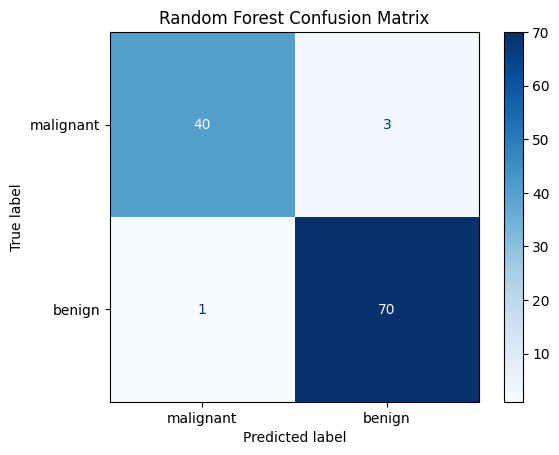

In [25]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()


**Q16-  Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.**

In [26]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, kernel='rbf', random_state=42)),
    ('logistic', LogisticRegression(max_iter=1000, random_state=42))
]

# Define Stacking Classifier with Logistic Regression as meta-model
stacking_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Train Stacking Classifier
stacking_model.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_stacking = stacking_model.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Stacking Classifier Accuracy:", accuracy_stacking)

# Compare with individual base estimators
for name, model in base_estimators:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Classifier Accuracy: 0.9649122807017544
decision_tree Accuracy: 0.9474
svm Accuracy: 0.9474
logistic Accuracy: 0.9561


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Q17-  Train a Random Forest Classifier and print the top 5 most important features.**

In [27]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top 5 most important features
top5_features = feature_importance_df.head(5)
print("Top 5 Most Important Features:")
print(top5_features)


Top 5 Most Important Features:
                 Feature  Importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001


**Q18-Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.**

In [28]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bagging Classifier with Decision Trees
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42,
    bootstrap=True
)
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Evaluate performance using Precision, Recall, and F1-score
report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Bagging Classifier Performance:\n")
print(report)


Bagging Classifier Performance:

              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



**Q19- Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.**

max_depth=None, Train Accuracy=1.0000, Test Accuracy=0.9649
max_depth=2, Train Accuracy=0.9538, Test Accuracy=0.9649
max_depth=4, Train Accuracy=0.9912, Test Accuracy=0.9649
max_depth=6, Train Accuracy=0.9934, Test Accuracy=0.9649
max_depth=8, Train Accuracy=1.0000, Test Accuracy=0.9649
max_depth=10, Train Accuracy=1.0000, Test Accuracy=0.9649
max_depth=12, Train Accuracy=1.0000, Test Accuracy=0.9649
max_depth=15, Train Accuracy=1.0000, Test Accuracy=0.9649


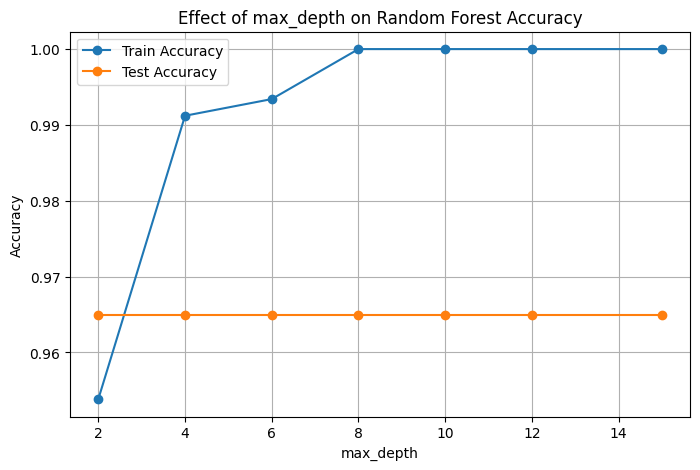

In [29]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of max_depth values to test
max_depth_values = [None, 2, 4, 6, 8, 10, 12, 15]

# Store training and testing accuracy for each max_depth
train_acc_list = []
test_acc_list = []

for depth in max_depth_values:
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)

    # Compute accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    print(f"max_depth={depth}, Train Accuracy={train_acc:.4f}, Test Accuracy={test_acc:.4f}")

# Plot accuracy vs max_depth
plt.figure(figsize=(8,5))
plt.plot(max_depth_values, train_acc_list, marker='o', label='Train Accuracy')
plt.plot(max_depth_values, test_acc_list, marker='o', label='Test Accuracy')
plt.title("Effect of max_depth on Random Forest Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


**Q20-  Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare
performance.**

In [30]:
# Import libraries
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
X, y = load_boston(return_X_y=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
estimators = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

# Train Bagging Regressor with different base estimators
for name, base_estimator in estimators.items():
    bagging_model = BaggingRegressor(
        estimator=base_estimator,
        n_estimators=50,
        random_state=42,
        bootstrap=True
    )
    bagging_model.fit(X_train, y_train)
    y_pred = bagging_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Bagging Regressor with {name}: MSE = {mse:.4f}")


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


**Q21- Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.**

ROC-AUC Score: 0.9952505732066819


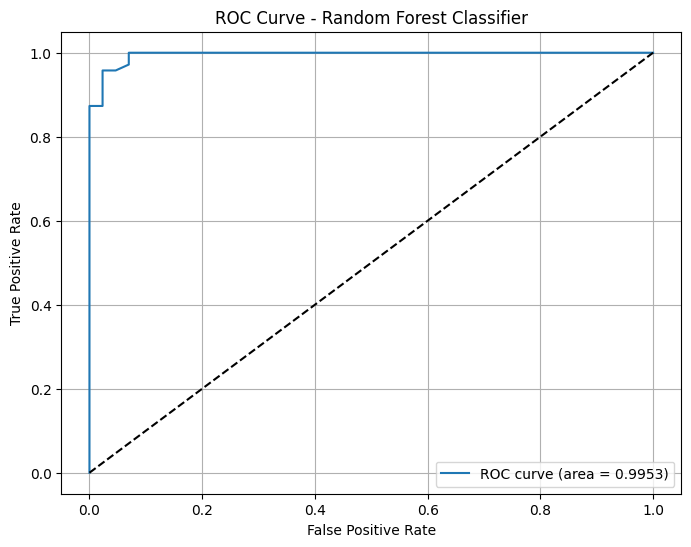

In [31]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# Optional: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**Q22- Train a Bagging Classifier and evaluate its performance using cross-validation.**

In [32]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import numpy as np

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Create Bagging Classifier with Decision Tree as base estimator
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42,
    bootstrap=True
)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(bagging_model, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


Cross-Validation Accuracy Scores: [0.9122807  0.92105263 0.98245614 0.95614035 1.        ]
Mean Cross-Validation Accuracy: 0.9543859649122808
Standard Deviation: 0.033928209834760914


**Q23- Train a Random Forest Classifier and plot the Precision-Recall curve.**

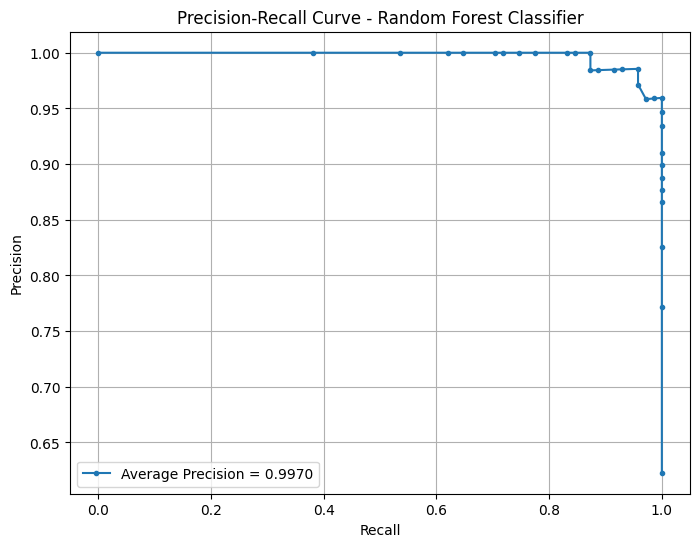

In [33]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label=f'Average Precision = {avg_precision:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest Classifier')
plt.legend()
plt.grid(True)
plt.show()


**Q24-  Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.**

In [34]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators for stacking
base_estimators = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('logistic', LogisticRegression(max_iter=1000, random_state=42))
]

# Define Stacking Classifier with Logistic Regression as meta-model
stacking_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Train Stacking Classifier
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Stacking Classifier Accuracy:", accuracy_stacking)

# Compare with individual base estimators
for name, model in base_estimators:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Classifier Accuracy: 0.9649122807017544
random_forest Accuracy: 0.9649
logistic Accuracy: 0.9561


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Q25-  Train a Bagging Regressor with different levels of bootstrap samples and compare performance.**

In [35]:
# Import libraries
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
X, y = load_boston(return_X_y=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of different bootstrap sample proportions to try
bootstrap_samples = [0.5, 0.7, 1.0]

# Train Bagging Regressor with different bootstrap sample sizes
for sample_ratio in bootstrap_samples:
    bagging_model = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=50,
        max_samples=sample_ratio,  # proportion of samples for each base estimator
        random_state=42,
        bootstrap=True
    )
    bagging_model.fit(X_train, y_train)
    y_pred = bagging_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Bagging Regressor with max_samples={sample_ratio}: MSE = {mse:.4f}")


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>
